# Problem Statement

The third data science project aimed to explore or experiment the NLP , Classification algorithm and API data reading.
And comparing the resiults of minimum two classification models.   For this project we read the data from reditt 
and we took data from two subredddit Cooking and OutoftheLoop.  And we loaded to the CSV file

Refer the Code page below for reading the data thru API call.  
[Documentation here](http://localhost:8888/notebooks/Downloads/projects/Project_3/Reading_Data.ipynb)

## First: Reading data and Data Cleaning

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Read in the .csv file.

Cooking = pd.read_csv("./Data/Cooking.csv",sep=',')
Outofloop = pd.read_csv("./Data/Outofloop.csv",sep=',')

In [3]:
# Check out the columns.

Outofloop.shape

(2465, 101)

In [4]:
Cooking.shape

(2492, 102)

In [5]:
Cooking.drop_duplicates(inplace=True)

In [6]:
Outofloop.drop_duplicates(inplace=True)

## First: Reading data and Data Cleaning

Data cleaning for the selftext which is considered for the classication of reddit post

In [7]:
Cooking['selftext']=Cooking['selftext'].astype(str)

#Changing the case to lower
Cooking['selftext']=Cooking['selftext'].str.lower()
Outofloop['selftext']=Outofloop['selftext'].str.lower()

#removing Special Characgters
Outofloop['selftext']=Outofloop['selftext'].str.replace(r'[^A-Za-z ]+', '', regex=True)
Cooking['selftext']=Cooking['selftext'].str.replace(r'[^A-Za-z ]+', '', regex=True)

#Removing website links
Cooking['selftext']= Cooking['selftext'].str.replace(r"http\S+", "")
Outofloop['selftext']= Outofloop['selftext'].str.replace(r"http\S+", "")

#Removing Special Characters
Cooking['selftext']= Cooking['selftext'].str.replace(r"\S*@\S*\s?","")
Outofloop['selftext']= Outofloop['selftext'].str.replace(r"\S*@\S*\s?","")

# Lemmatizing and Stemming

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


Outofloop['selftext'] = Outofloop['selftext'].apply(lambda row: lemmatizer.lemmatize((row)))

Cooking['selftext'] = Cooking['selftext'].apply(lambda row: lemmatizer.lemmatize((row)))

from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()

Outofloop['selftext'] = Outofloop['selftext'].apply(lambda row: p_stemmer.stem((row)))
Cooking['selftext'] = Cooking['selftext'].apply(lambda row: p_stemmer.stem((row)))


# Removing StopWords

In [9]:

#Removing stopwords
from sklearn.feature_extraction import stop_words
 
stop = stop_words.ENGLISH_STOP_WORDS

pat = r'\b(?:{})\b'.format('|'.join(stop))
Cooking['selftext']=Cooking['selftext'].str.replace(pat, '')

Outofloop['selftext']=Outofloop['selftext'].str.replace(pat, '')

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stopwords))

Cooking['selftext']=Cooking['selftext'].str.replace(pat, '')

Outofloop['selftext']=Outofloop['selftext'].str.replace(pat, '')

stopwords = ['like','comment','dont','didnt','seeing','seen','ive','im','using','use','saw']
pat = r'\b(?:{})\b'.format('|'.join(stopwords))

Cooking['selftext']=Cooking['selftext'].str.replace(pat, '')

Outofloop['selftext']=Outofloop['selftext'].str.replace(pat, '')



# Word Cloud  - Subreddit#1 (Cooking)

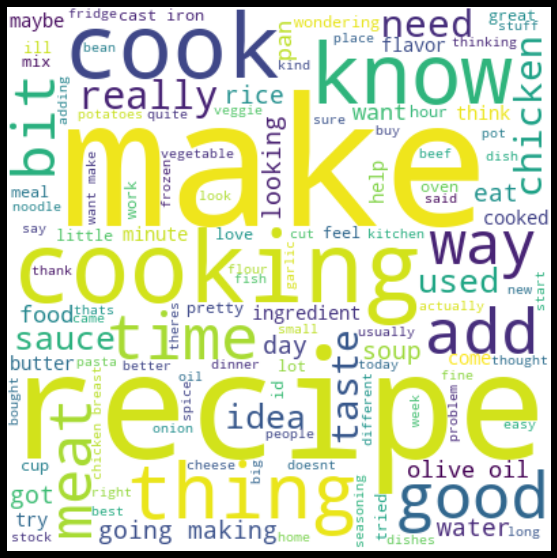

In [49]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# Iterate through each word in each sentence.
for sentence in Cooking['selftext']:
    for word in sentence.split():
        comment_words_cooking =''
        
# Iterate back through each word in each sentence.
for sentence in Cooking['selftext']:
    for word in sentence.split():
        comment_words_cooking = comment_words_cooking + word + ' '

text = comment_words_cooking

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str(text))

fig = plt.figure(
    figsize = (15, 10),
    facecolor = 'k',
    edgecolor = 'k')
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word Cloud  - Subreddit#2 (Outoftheloop)

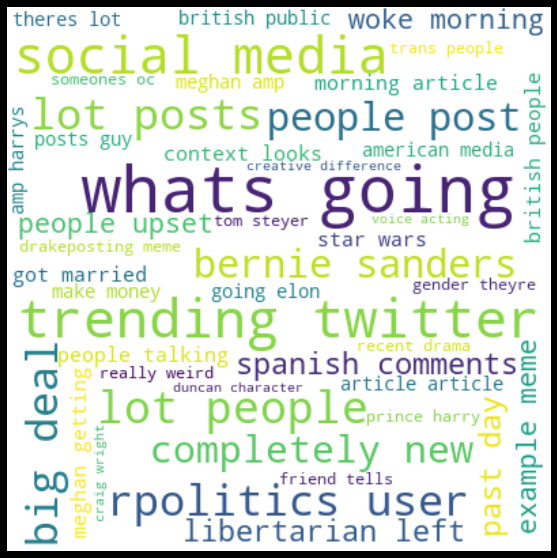

In [50]:


# Iterate through each word in each sentence.
for sentence in Outofloop['selftext']:
    for word in sentence.split():
        comment_words_Outofloop =''
        
# Iterate back through each word in each sentence.
for sentence in Outofloop['selftext']:
    for word in sentence.split():
        comment_words_Outofloop = comment_words_Outofloop + word + ' '

text = comment_words_Outofloop

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str(text))

fig = plt.figure(
    figsize = (15, 10),
    facecolor = 'k',
    edgecolor = 'k')
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Merging the data sets

Concatenate the cooking and outofloop dataset and take only the necessary columns from both the dartasets

In [12]:
# Remove extra columns.

merge1 = Cooking[['subreddit', 'selftext', 'title',
         'subreddit_type', 'likes', 'score', 'author', 'category']]

merge2= Outofloop[['subreddit', 'selftext', 'title',
         'subreddit_type', 'likes', 'score', 'author', 'category']]

merge=pd.concat([merge1,merge2],ignore_index=True)

In [13]:
#create the boolean column which is the output column which is based on the subreddit
merge['Cooking'] = [1 if merge.loc[i,'subreddit'] == 'Cooking' else 0 for i in range(merge.shape[0])]

In [14]:
merge['Cooking'].value_counts()

1    2236
0    1876
Name: Cooking, dtype: int64

In [15]:
merge.head()

,subreddit,selftext,title,subreddit_type,likes,score,author,category,Cooking
0,Cooking,years ago noticed fresh pasta came marke...,"Is the ""fresh"" pasta you get in the refrigerat...",public,NaN,616,kempff,NaN,1
1,Cooking,really want eat pasta pizza exhausted ...,I work as a waitress and come home anytime bet...,public,NaN,358,chicichi,NaN,1
2,Cooking,pearl sugar want spend chunk pearl sug...,Someone last week posted about making Liège wa...,public,NaN,87,ilikemrrogers,NaN,1
3,Cooking,decorate cakes fairly tonight decorati...,"When life gives you a broken cake, make trifle",public,NaN,885,TheLadyEve,NaN,1
4,Cooking,uncut dacquoise courtesy fine cooking minor...,I asked for advice for Dacquoise a little whil...,public,NaN,16,Wanzer-Reznaw,NaN,1


In [16]:
merge.drop_duplicates(inplace=True)

In [17]:
merge['Cooking'].value_counts()

1    1237
0     981
Name: Cooking, dtype: int64

You may note that there are some extra symbols in the data. This is a common problem in natural language processing, especially when dealing with social media. 

# Split the data into x and Y

In [18]:
#Split our data into x and y
X = merge[['selftext']]
y = merge['Cooking']

In [19]:
X.head()

,selftext
0,years ago noticed fresh pasta came marke...
1,really want eat pasta pizza exhausted ...
2,pearl sugar want spend chunk pearl sug...
3,decorate cakes fairly tonight decorati...
4,uncut dacquoise courtesy fine cooking minor...


Split our data into training and testing sets.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Turn our text into features.

In [21]:
# Import CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate our CountVectorizer.
cvec = CountVectorizer(max_features = 500, stop_words = 'english')

In [22]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_cvec = pd.DataFrame(cvec.fit_transform(X_train['selftext'].values.astype('U')).todense(),columns = cvec.get_feature_names())

In [23]:
# Transform our testing data with the already-fit CountVectorizer.
X_test_cvec = pd.DataFrame(cvec.transform(X_test['selftext'].values.astype('U')).todense(),
                         columns = cvec.get_feature_names())

In [24]:
X_train_cvec.head()

,able,absolutely,actual,actually,add,added,adding,advice,ago,ahead,...,working,world,worth,wrong,year,years,yolks,youre,youtube,zest
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model 1 : Fit a Naive Bayes model!



In [25]:
# Import our model!

from sklearn.naive_bayes import MultinomialNB

In [26]:
# Instantiate our model!

nb = MultinomialNB()

In [27]:
# Fit our model!

model = nb.fit(X_train_cvec, y_train)

In [28]:
# Score our model on the training set.

model.score(X_train_cvec, y_train)

0.9500901984365604

In [29]:
# Generate our predictions!

predictions = model.predict(X_test_cvec)


In [30]:
# Score our model on the testing set.

model.score(X_test_cvec, y_test)

0.9603603603603603

In [31]:
# Import the confusion matrix function.

from sklearn.metrics import confusion_matrix

In [32]:
# Generate a confusion matrix.

cm1=confusion_matrix(y_test, predictions)

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [34]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 228
False Positives: 17
False Negatives: 5
True Positives: 305


#  Model 2 : Logistic Regression

Finding the best parameters for the Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.001, 0.01, 0.1, 1, 10],
              'class_weight': [None, 'balanced'],
              'penalty': ['l1', 'l2']}

gs_results = GridSearchCV(estimator = LogisticRegression(random_state = 42, solver='liblinear'), # Specify the model we want to GridSearch.
                          param_grid = parameters,                           # Specify the grid of parameters we want to search.
                          scoring = 'recall',                                # Specify recall as the metric to optimize 
                          cv = 50).fit(X_train_cvec, y_train)                      # Set 5-fold cross-validation, then fit. (Default is 3.)

/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
gs_results.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Based on the best estimator rebuild the model with the optimized parameters

In [37]:
logit = LogisticRegression(C = 10,
                           class_weight = None,
                           penalty = 'l1',
                           random_state = 42)

In [38]:
logit.fit(X_train_cvec,y_train)
        

/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
logit.score(X_train_cvec, y_train)

0.9957907396271798

In [40]:
logit.score(X_test_cvec, y_test)

0.9783783783783784

In [41]:
predictions2 = logit.predict(X_test_cvec)

In [42]:
cm2=confusion_matrix(y_test, predictions)

In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions2).ravel()

In [44]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 244
False Positives: 1
False Negatives: 11
True Positives: 299


# Comparing the two model outcomes

The Confusion matrix and classification report of the two models are compared. 

[Text(0, 0.5, 'Cooking'), Text(0, 1.5, 'OutoftheLoop')]

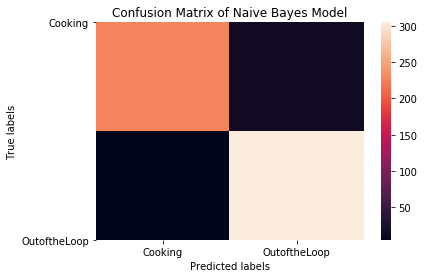

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm1) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix of Naive Bayes Model')
ax.xaxis.set_ticklabels(['Cooking', 'OutoftheLoop'],rotation='horizontal')
ax.yaxis.set_ticklabels(['Cooking', 'OutoftheLoop'],rotation='horizontal')

[Text(0, 0.5, 'Cooking'), Text(0, 1.5, 'OutoftheLoop')]

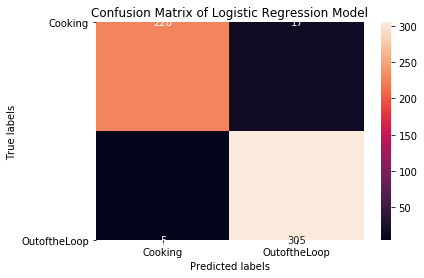

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(cm2,annot=True,fmt ="d",annot_kws=akws) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix of Logistic Regression Model')
ax.xaxis.set_ticklabels(['Cooking', 'OutoftheLoop'],rotation='horizontal')
ax.yaxis.set_ticklabels(['Cooking', 'OutoftheLoop'],rotation='horizontal')

          Classification report for the Naive Bayes Model

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       245
           1       0.95      0.98      0.97       310

    accuracy                           0.96       555
   macro avg       0.96      0.96      0.96       555
weighted avg       0.96      0.96      0.96       555



Classification report for the Logistic Regression(Grid Search the best parameters) 

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       245
           1       1.00      0.96      0.98       310

    accuracy                           0.98       555
   macro avg       0.98      0.98      0.98       555
weighted avg       0.98      0.98      0.98       555



# Conclusion:

The project compares the models outcomes and logistic regression model perform better than naive Byes